### PRCP- 1001- RiceLeaf disease detection

### Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.

### Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-Create a model which can classify the three major attacking diseases of rice plants like leaf blast, bacterial blight and brown spot.

Task3:- Analyze various techniques like Data Augmentation, etc and create a report on that.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import cv2

import os

In [3]:
import tensorflow as  tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Lambda
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization
from keras.models import Model  
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
#import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
## The warnings in TensorFlow could be managed by tf.get_logger().setLevel().
## To turn off the warnings you can use
tf.get_logger().setLevel('ERROR')

### Read The Image

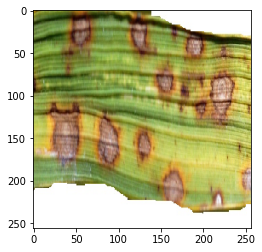

In [5]:
# Reading the image
from keras.utils import load_img, img_to_array
img = load_img("/content/drive/MyDrive/DataMites Internship Projet/Adesh/Rice Leaf/Data/train/Brown spot/DSC_0106.jpg", target_size = (256,256))
img = np.asarray(img)
plt.imshow(img)

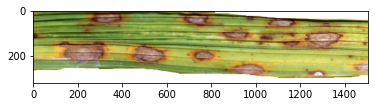

In [6]:
imre = plt.imread("/content/drive/MyDrive/DataMites Internship Projet/Adesh/Rice Leaf/Data/train/Brown spot/DSC_0106.jpg")
img1 = plt.imshow(imre)

In [7]:
## dimension of image
## img.shape --> returns height, width and number of channels(number of components used to represent each pixel)
imre.shape

(323, 1504, 3)

In [8]:
cv2.resize(imre, (256, 256)).shape

(256, 256, 3)

In [9]:
image_size = 256
batch_size = 32
channels = 3

In [10]:
#Give dataset path
train_path = '/content/drive/MyDrive/DataMites Internship Projet/Adesh/Rice Leaf/Data/train'
test_path = '/content/drive/MyDrive/DataMites Internship Projet/Adesh/Rice Leaf/Data/test'

In [11]:
# useful for getting number of classes
train_folders = glob('/content/drive/MyDrive/DataMites Internship Projet/Adesh/Rice Leaf/Data/train/*')
print(len(train_folders))

3


In [12]:
# useful for getting number of classes
test_folders = glob('/content/drive/MyDrive/DataMites Internship Projet/Adesh/Rice Leaf/Data/test/*')
print(len(test_folders))

3


In [50]:
model = Sequential([
    Conv2D(16, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(128, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(256, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Conv2D(512, 3, padding = 'same', activation = 'relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(700, activation = 'relu'),
    Dropout(0.4),
    Dense(3, activation = 'softmax')
])

In [47]:
model.layers

In [18]:
from keras.optimizers import Adam

In [51]:
model.compile(optimizer = 'adam',
              loss = "categorical_crossentropy",
              metrics = ['accuracy'])      

In [ ]:
# optimizer = Adam(lr = 0.0001)
# model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ['accuracy'])

In [ ]:
# # Data Augmentation
# train_datagen = ImageDataGenerator(width_shift_range = 0.1,
#                                   horizontal_flip = True,
#                                   rescale = 1./255,
#                                   validation_split = 0.2)

In [20]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.0,
    rescale = 1./255,
    )

In [ ]:
# # Data Augmentation
# test_datagen = ImageDataGenerator(rescale = 1./255,
#                                  validation_split = 0.2)

In [21]:
# Data Augmentation
test_datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split = 0.0,
    rescale = 1./255,
    )

In [22]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size = (image_size, image_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',)
                                              # subset = 'training')

Found 84 images belonging to 3 classes.


In [23]:
val_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (image_size, image_size),
                                            color_mode = 'rgb',
                                            batch_size = batch_size,
                                            class_mode = 'categorical',)
                                            # subset = 'validation')

Found 36 images belonging to 3 classes.


In [33]:
epochs = 500

In [34]:
STEP_SIZE_TRAIN = train_set.n // train_set.batch_size
STEP_SIZE_VALID = val_set.n // val_set.batch_size

In [28]:
STEP_SIZE_VALID

1

In [ ]:
# from datetime import datetime
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler
# from keras.callbacks import ReduceLROnPlateau

# #lr_scheduler = LearningRateScheduler(lr_schedule)

# lr_reducer = ReduceLROnPlateau(factor = np.sqrt(0.1),
#                                cooldown = 0,
#                                patience = 5,
#                                min_lr = 0.5e-6)

# #num_epochs = 1000
# #num_batch_size = 32

# checkpoint = ModelCheckpoint(filepath = 'rice_leaf.h5', 
#                                verbose = 1, save_best_only = True)

# callbacks = [checkpoint, lr_reducer]

# start = datetime.now()

# hist = model.fit_generator(
#                           train_set,
#                           validation_data = val_set,
#                           epochs = epochs,
#                           steps_per_epoch = STEP_SIZE_TRAIN,
#                           validation_steps = STEP_SIZE_VALID,
#                           callbacks = callbacks , verbose = 1)


# duration = datetime.now() - start
# print("Training completed in time: ", duration)

In [52]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath = 'rice_leaf.h5',
                               verbose = 1,
                               save_best_only = True)


# epoch = 100
start = datetime.now()

hist = model.fit(train_set,
                 epochs = epochs,
                 verbose = 1,
                 steps_per_epoch = STEP_SIZE_TRAIN,
                 validation_steps = STEP_SIZE_VALID,
                 callbacks = [checkpointer],
                 validation_data = val_set)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
2/2 [==============================] - ETA: 0s - loss: 1.2310 - accuracy: 0.1923 
Epoch 1: val_loss improved from inf to 1.10132, saving model to rice_leaf.h5
2/2 [==============================] - 19s 8s/step - loss: 1.2310 - accuracy: 0.1923 - val_loss: 1.1013 - val_accuracy: 0.3125
Epoch 2/500
2/2 [==============================] - ETA: 0s - loss: 1.0992 - accuracy: 0.3281
Epoch 2: val_loss did not improve from 1.10132
2/2 [==============================] - 15s 7s/step - loss: 1.0992 - accuracy: 0.3281 - val_loss: 1.1015 - val_accuracy: 0.2812
Epoch 3/500
2/2 [==============================] - ETA: 0s - loss: 1.1010 - accuracy: 0.2692
Epoch 3: val_loss improved from 1.10132 to 1.09881, saving model to rice_leaf.h5
2/2 [==============================] - 15s 9s/step - loss: 1.1010 - accuracy: 0.2692 - val_loss: 1.0988 - val_accuracy: 0.3438
Epoch 4/500
2/2 [==============================] - ETA: 0s - loss: 1.0982 - accuracy: 0.3438
Epoch 4: val_loss improved from 1.09881 t

In [53]:
score = model.evaluate(val_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 4s 118ms/step - loss: 1.2341 - accuracy: 0.9167
Test Loss: 1.2340800762176514
Test accuracy: 0.9166666865348816


In [54]:
score

[1.2340800762176514, 0.9166666865348816]

In [55]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [57]:
# model.load_weights("/content/model.weights.best.hdf5")

In [58]:
# Load the model
from keras import models
saved_model = models.load_model("/content/rice_leaf.h5")

1/1 [==============================] - 0s 170ms/step
Prediction ::::::::::::::::  [0]


NameError: ignored

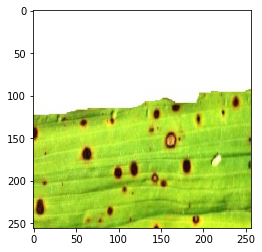

In [ ]:
## Prediction on custom image i.e outside the data

# from keras.preprocessing import image
from keras.utils import load_img, img_to_array
img = load_img("/content/drive/MyDrive/DataMites Internship Projet/Adesh /Rice Leaf/data/Brown spot/DSC_0107.jpg", target_size = (256, 256))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

output = model.predict(img)

score = output
score1 = np.argmax(score, axis=-1)
print('Prediction :::::::::::::::: ', score1)
print(encode.inverse_transform([score1]))  ## Printing Label
print('\n\n')